# EDA(데이터 사전 탐색)
* ㅇㅇㅇ
* <img src="https://storage.googleapis.com/kaggle-avatars/thumbnails/2123807-kg.jpg">

In [294]:
# coding: utf-8
# Module Name : titanic.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
#%matplotlib inline

# from sklearn.datasets import ____
# from sklearn.metrics import ____
# from sklearn. import ____

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# shape describe() info() head()
train_df.shape  #750 * 13


(891, 12)

In [295]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [296]:
train_df.head()  #head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 전처리/가공(Feature PreProcessing/Engineering)

* 정규화
* 스케일링
* 결측처리
* 인코딩 
* 카테고리(범주)  
* 특이/이상치(Outlier) 
       

### 결측처리 : 삭제(drop)/대체(fillna)

In [298]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [299]:
train_df["Embarked"].fillna('S',inplace=True)

In [300]:
train_df["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
D              3
              ..
D45            1
E12            1
A20            1
C85            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [301]:
train_df["Cabin"].fillna('N',inplace=True)

In [302]:
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)


## 피쳐 삭제

In [303]:
train_df.drop("PassengerId", axis=1, inplace=True)

In [304]:
train_df["PC"] = train_df["SibSp"] + train_df["Parch"]

train_df.drop(["SibSp","Parch"], axis=1, inplace=True)



In [305]:
train_df.head()  

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,PC
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,N,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,N,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,N,S,0


## 통계 : 단변량 이변량 다변량 분석

In [306]:
train_df[["Embarked","Survived"]].groupby(["Embarked"]).sum().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
S,219
C,93
Q,30


In [307]:
train_df[["Pclass","Survived"]].groupby(["Pclass"]).sum().sort_values(by="Survived", ascending=False)

,Survived
Pclass,
1,136
3,119
2,87


In [308]:
train_df["Cabin"] = train_df["Cabin"].str[0:1]

train_df[["Cabin","Survived"]].groupby(["Cabin"]).sum().sort_values(by="Survived", ascending=False)


,Survived
Cabin,
N,206
B,35
C,35
D,25
E,24
F,8
A,7
G,2
T,0


In [309]:
train_df.drop(["Ticket","Fare","Cabin","Embarked"], axis=1, inplace=True)

In [310]:
train_df["Name_cc"] = train_df["Name"].str.extract("([A-Za-z]+)\.")
train_df["Name_cc"].value_counts()
train_df[["Name_cc","Survived"]].groupby(["Name_cc"]).sum().sort_values(by="Survived", ascending=False)

# train_df.drop(["Ticket","Fare","Cabin","Embarked"], axis=1, inplace=True)

,Survived
Name_cc,
Miss,127
Mrs,99
Mr,81
Master,23
Dr,3
Mlle,2
Ms,1
Mme,1
Sir,1


In [311]:
train_df[["Sex","Pclass","Survived"]].groupby(["Sex","Pclass"]).sum().sort_values(by="Survived", ascending=False)


Survived
Sex    Pclass          
female 1             91
       3             72
       2             70
male   3             47
       1             45
       2             17

In [312]:
train_df[["PC","Survived"]].groupby(["PC"]).sum().sort_values(by="Survived", ascending=False)


,Survived
PC,
0,163
1,89
2,59
3,21
6,4
4,3
5,3
7,0
10,0


* Age : 구간화/범주화

In [313]:
#train_df[["Age","Survived"]].groupby(["Age"]).sum().sort_values(by="Survived", ascending=False).T


In [314]:
def age_cate(age):
    if age>=0 and age<20:
        acate = 1
    elif age>=20 and age<40:
        acate = 2    
    elif age>=40 and age<60:
        acate = 3
    else:
        acate = 4
    return acate

train_df["Age_cate"] = train_df["Age"].apply(age_cate)
train_df.head()

,Survived,Pclass,Name,Sex,Age,PC,Name_cc,Age_cate
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,Mr,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,Mrs,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,Miss,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,Mrs,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,Mr,2


In [315]:
train_df["Age_cate2"] = train_df["Age"].apply(lambda x : 1  if (x>=0 and x<20)  else (2  if (x>=20 and x<40)  else (3  if (x>=40 and x<60)  else 4)))
train_df.head()  

,Survived,Pclass,Name,Sex,Age,PC,Name_cc,Age_cate,Age_cate2
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,Mr,2,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,Mrs,2,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,Miss,2,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,Mrs,2,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,Mr,2,2


In [316]:
train_df[["Age_cate","Survived"]].groupby(["Age_cate"]).sum().sort_values(by="Survived", ascending=False).T


Age_cate,2,1,3,4
Survived,202,79,54,7


In [317]:
train_df.drop("Age", axis=1, inplace=True)

* Sex : 0 / 1 카테고리화 - 함수 사용한 경우

In [318]:
def sex_cate(sex):
    if sex == "female":
        scate =  1
    else:
        scate = 0
    return scate

train_df["Sex_cate1"] = train_df["Sex"].apply(sex_cate)
train_df.head()  


,Survived,Pclass,Name,Sex,PC,Name_cc,Age_cate,Age_cate2,Sex_cate1
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,2,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,Mrs,2,2,1
2,1,3,"Heikkinen, Miss. Laina",female,0,Miss,2,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,Mrs,2,2,1
4,0,3,"Allen, Mr. William Henry",male,0,Mr,2,2,0


* Sex : 0 / 1 - lambda 식 사용한 경우

In [319]:
train_df["Sex_cate2"] = train_df["Sex"].apply(lambda x : 1 if x == "female" else 0)
train_df.head()  

,Survived,Pclass,Name,Sex,PC,Name_cc,Age_cate,Age_cate2,Sex_cate1,Sex_cate2
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,2,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,Mrs,2,2,1,1
2,1,3,"Heikkinen, Miss. Laina",female,0,Miss,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,Mrs,2,2,1,1
4,0,3,"Allen, Mr. William Henry",male,0,Mr,2,2,0,0


## 피쳐 상관분석

In [320]:
drop_col = ["Name","Sex","Sex_cate2","Name_cc","Age_cate2"]
train_df.drop(columns = drop_col, axis=1, inplace=True)

In [321]:
train_df.head()

,Survived,Pclass,PC,Age_cate,Sex_cate1
0,0,3,1,2,0
1,1,1,1,2,1
2,1,3,0,2,1
3,1,1,1,2,1
4,0,3,0,2,0


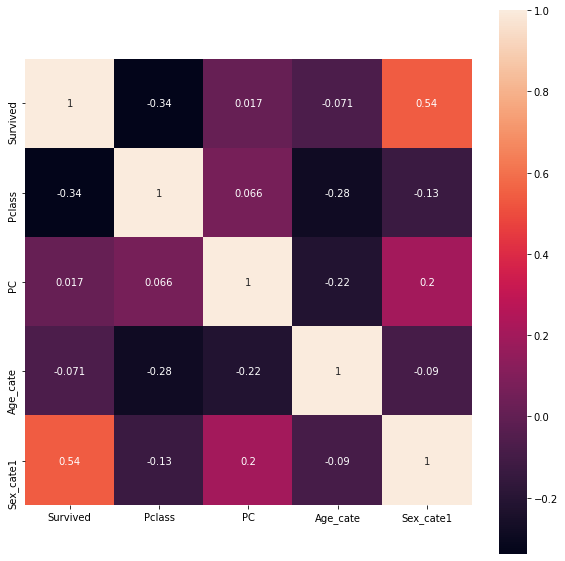

In [322]:
corr = train_df.corr()
plt.figure(figsize=(10, 10));
sns.heatmap(corr, square=True, annot=True);
plt.show() 
# heatmap by seaborn
# ax = sns.heatmap(train_df)
# plt.title('Heatmap', fontsize=20)
# plt.show() 

# 분석(모델선정/평가척도/검증)

## 학습용(train) 시험용(test) 데이터 준비

In [323]:
정답y = train_df["Survived"]
문제X = train_df.drop("Survived", axis=1)
print(문제X.shape, 정답y.shape)

(891, 4) (891,)


In [324]:
문제X.head()

,Pclass,PC,Age_cate,Sex_cate1
0,3,1,2,0
1,1,1,2,1
2,3,0,2,1
3,1,1,2,1
4,3,0,2,0


In [335]:
from sklearn.model_selection import train_test_split
학습문제X7,시험문제X3,학습단안y7,시험정답y3 = train_test_split(문제X,정답y, test_size=0.3, random_state=11)
print(X7.shape, y7.shape)

(623, 4) (623,)


In [341]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

모델dt = DecisionTreeClassifier()
모델rf = RandomForestClassifier()

In [342]:
print(X7.shape, y7.shape)
#학습 : fit()  학습문제X7,시험문제X3,학습정답y7,시험정답y3
모델dt.fit(학습문제X7, 학습단안y7)

(623, 4) (623,)


DecisionTreeClassifier()

In [343]:
#예측==시험 : predict()
예측답안y3 = 모델dt.predict(시험문제X3)

In [344]:
#평가(점수) ==?
from sklearn.metrics import accuracy_score
score = accuracy_score(시험정답y3,예측답안y3)
print(score)

0.8283582089552238


# ===== 공모전용 ----------------

In [363]:

# 데이터 수집/준비 ---------
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
제출_df = pd.DataFrame({'PassengerId':test_df["PassengerId"]})

		# 가공df 가공/전처리..한번에하기---------
		# 가공df = train_df + test_df
		# 가공 후 원래데로 분리시키기------------
		# testcsv = 가공df[  가공df["Servived"].isnull() == True ] 
		# traincsv = 가공df[  가공df["Servived"].isnull() == False] 


		# dflist = [train_df, test_df]
		# for df in dflist:
		#	#전처리/가공(Feature PreProcessing/Engineering)
		#	df["Embarked"].fillna('S',inplace=True)
		#	df["Cabin"].fillna('N',inplace=True)


#전처리/가공(Feature PreProcessing/Engineering) --- 결측처리
train_df["Embarked"].fillna('S',inplace=True)
test_df["Embarked"].fillna('S',inplace=True)

train_df["Cabin"].fillna('N',inplace=True)
test_df["Cabin"].fillna('N',inplace=True)

train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
test_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

#전처리/가공(Feature PreProcessing/Engineering) --- PCA(차원축소) 비슷하게...
train_df["PC"] = train_df["SibSp"] + train_df["Parch"]
test_df["PC"] = test_df["SibSp"] + test_df["Parch"]

#전처리/가공(Feature PreProcessing/Engineering) --- 범주화/구간화
train_df["Age_cate2"] = train_df["Age"].apply(lambda x : 1  if (x>=0 and x<20)  else (2  if (x>=20 and x<40)  else (3  if (x>=40 and x<60)  else 4)))
test_df["Age_cate2"] = train_df["Age"].apply(lambda x : 1  if (x>=0 and x<20)  else (2  if (x>=20 and x<40)  else (3  if (x>=40 and x<60)  else 4)))

train_df["Sex_cate2"] = train_df["Sex"].apply(lambda x : 1 if x == "female" else 0)
test_df["Sex_cate2"] = train_df["Sex"].apply(lambda x : 1 if x == "female" else 0)


#전처리/가공(Feature PreProcessing/Engineering) --- 불필요한 피쳐 삭제
drop_col = ["PassengerId","SibSp","Parch","Ticket","Fare","Cabin","Embarked","Age","Name","Sex","Sex_cate2","Age_cate2"]
train_df.drop(columns = drop_col, axis=1, inplace=True)
test_df.drop(columns = drop_col, axis=1, inplace=True)


		#--- 튜닝시작 : train(학습7/검증3)          시험(그데로)
		# from sklearn.tree import DecisionTreeClassifier
		# from sklearn.ensemble import RandomForestClassifier
		# best_model...


# 분석모델 선정 or best_model ---------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

모델dt = DecisionTreeClassifier()
모델rf = RandomForestClassifier()

#학습 : fit() 
학습답안 =  train_df["Survived"]
학습문제 =  train_df.drop("Survived", axis=1)
모델dt.fit(학습문제, 학습답안)


예측답안 = 모델dt.predict(test_df)

제출_df["Survived"] = 예측답안
제출_df.to_csv("submission.csv", index=False)
print(제출_df.head())

# ------------평가 : 이하 코드는 kaggle leaderboard가 채점한다.
# from sklearn.metrics import accuracy_score
# score = accuracy_score(캐글정답,   내가제출한답안)
# print(score)


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
